In [16]:
from torch.utils.data import DataLoader
from torchvision.transforms import RandomCrop
import matplotlib.pyplot as plt

from src.datasets.UAVidSemanticSegmentationDataset import (
    UAVidSemanticSegmentationDataset,
)

In [17]:
UAVID_DATASET_PATH = "data/UAVidSemanticSegmentationDataset"

In [18]:
train_dataset = UAVidSemanticSegmentationDataset(UAVID_DATASET_PATH, split="train")
print(len(train_dataset))

200


In [19]:
val_dataset = UAVidSemanticSegmentationDataset(UAVID_DATASET_PATH, split="valid")
print(len(val_dataset))

70


In [20]:
test_dataset = UAVidSemanticSegmentationDataset(UAVID_DATASET_PATH, split="test")
print(len(test_dataset))

10


In [21]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

torch.Size([1, 3, 2160, 3840])
torch.Size([1, 1, 2160, 3840])


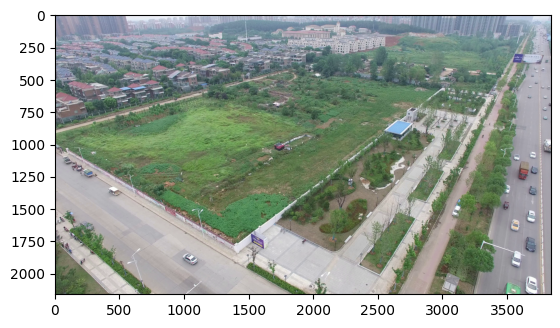

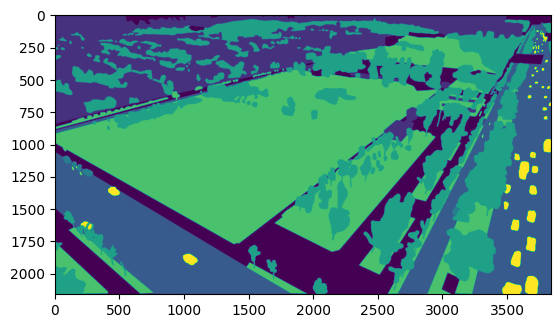

In [22]:
for images, masks in train_loader:
    print(images.shape)
    print(masks.shape)
    plt.imshow(images[0].permute(1, 2, 0))
    plt.show()
    plt.imshow(masks[0].squeeze(0))
    plt.show()
    break

In [23]:
for images, masks in val_loader:
    print(images.shape)
    print(masks.shape)
    break

torch.Size([1, 3, 2160, 3840])
torch.Size([1, 1, 2160, 3840])


In [24]:
for images in test_loader:
    print(images.shape)
    break

torch.Size([1, 3, 2160, 3840])


### Cropping

In [25]:
IMAGE_WIDTH = 1024
IMAGE_HEIGHT = 576

In [26]:
train_dataset = UAVidSemanticSegmentationDataset(
    UAVID_DATASET_PATH,
    split="train",
    transforms=[
        RandomCrop((IMAGE_HEIGHT, IMAGE_WIDTH)),
    ],
    image_height=IMAGE_HEIGHT,
    image_width=IMAGE_WIDTH,
)
print(len(train_dataset))

200


In [27]:
images, masks = train_dataset.__getitem__(0)

In [28]:
images, masks = train_dataset[0]

In [29]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

torch.Size([1, 3, 576, 1024])
torch.Size([1, 1, 576, 1024])


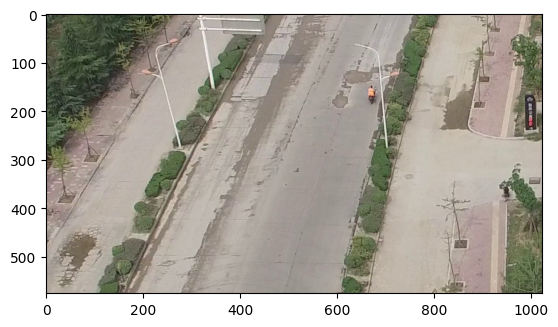

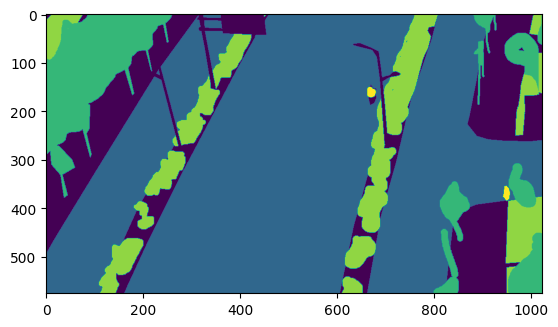

In [30]:
for images, masks in train_loader:
    print(images.shape)
    print(masks.shape)
    plt.imshow(images[0].permute(1, 2, 0))
    plt.show()
    plt.imshow(masks[0].squeeze(0))
    plt.show()
    break